## Exploratory analysis

Get the "feel" for data. We have a record of appointments from a hospital in Brasil. Our goal is to predict whether a patient comes to the appointment or not.

In [3]:
# Import dependencies
from __future__ import print_function
# Import NumPy
import numpy as np
# Import Pandas
import pandas as pd
# Import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
# Import
import seaborn as sns

In [4]:
# Read raw dataset
df = pd.read_csv('no-show-hospital-data.csv')

## Check a couple of observations

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [7]:
df.sample(random_state=1234, n=5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
80549,3.792432e+11,5686391,F,2016-05-11T13:15:13Z,2016-05-11T00:00:00Z,35,CARATOÍRA,1,0,0,0,0,0,No
25671,5.538676e+13,5678696,F,2016-05-10T08:54:28Z,2016-05-20T00:00:00Z,3,GOIABEIRAS,0,0,0,0,0,0,Yes
110163,3.754762e+14,5714534,F,2016-05-18T12:07:40Z,2016-06-06T00:00:00Z,30,JARDIM DA PENHA,0,0,0,0,0,1,Yes
93639,9.789162e+12,5742692,M,2016-05-30T08:15:40Z,2016-06-01T00:00:00Z,17,BONFIM,0,0,0,0,0,0,Yes
102750,1.753423e+12,5741982,F,2016-05-30T07:37:13Z,2016-06-01T00:00:00Z,54,ENSEADA DO SUÁ,0,0,0,0,0,0,Yes


## Check observations

In [8]:
df.shape

(110527, 14)

In [9]:
df.PatientId.nunique()

62299

Number of unique patient IDs is less than total number of appointments. This means that there are multiple appointments per person.

In [10]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [12]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No missing values in the dataset.

In [13]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

PatientId is a float but should either be an integer or a string. In either case we're not going to use the ID in its current form. Need to explore how do appointments look like when grouped by patient IDs. Are some of the appointments reschedules?

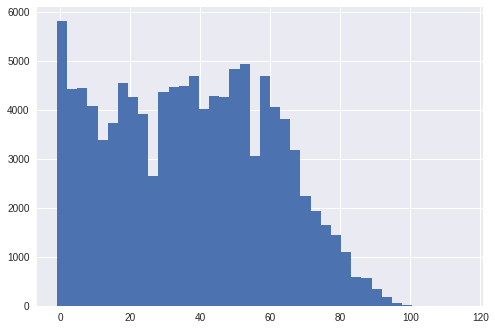

In [21]:
df.Age.hist(bins=40)
plt.show()

The age distribution is left skewed. When we're building a train dataset we should keep this in mind for stratification purposes.

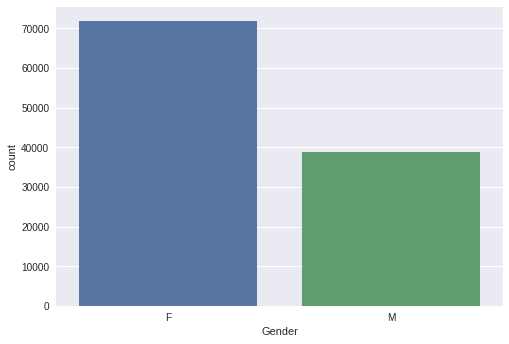

In [23]:
sns.countplot('Gender', data=df)
plt.show()

In [26]:
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

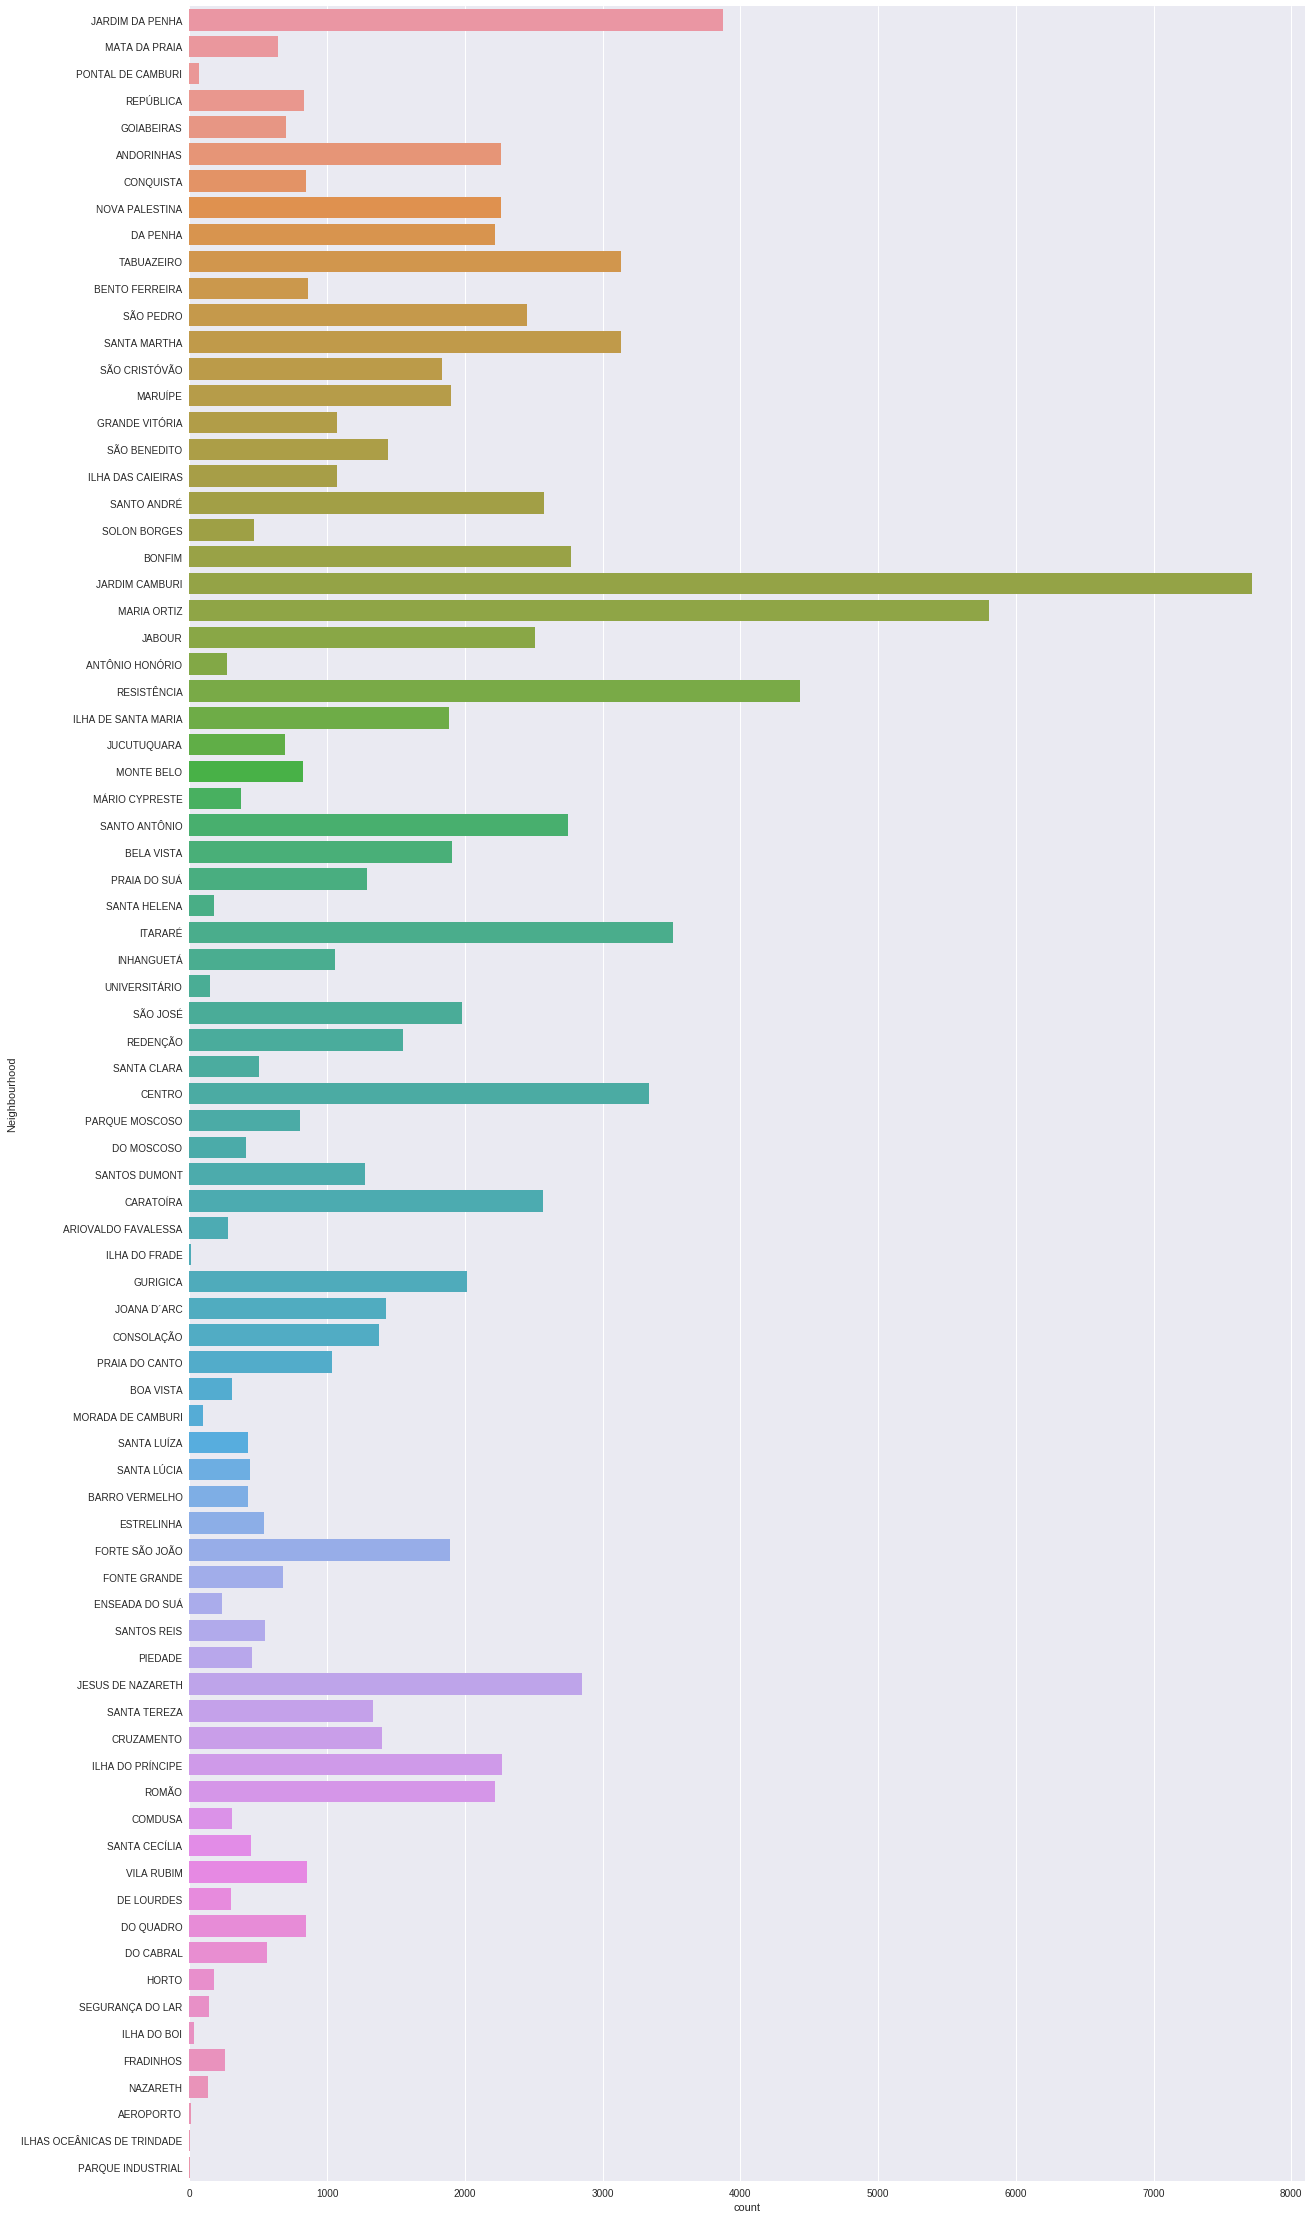

In [34]:
fig, ax = plt.subplots(figsize=(20, 40))
sns.countplot(y='Neighbourhood', data=df)
plt.show()

Hospitals in some neighbourhoods have significantly fewer observations than the others. There are sparse classes.

In [42]:
df.groupby('Neighbourhood').size().sort_values()

Neighbourhood
PARQUE INDUSTRIAL                 1
ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         8
ILHA DO FRADE                    10
ILHA DO BOI                      35
PONTAL DE CAMBURI                69
MORADA DE CAMBURI                96
NAZARETH                        135
SEGURANÇA DO LAR                145
UNIVERSITÁRIO                   152
HORTO                           175
SANTA HELENA                    178
ENSEADA DO SUÁ                  235
FRADINHOS                       258
ANTÔNIO HONÓRIO                 271
ARIOVALDO FAVALESSA             282
DE LOURDES                      305
COMDUSA                         310
BOA VISTA                       312
MÁRIO CYPRESTE                  371
DO MOSCOSO                      413
BARRO VERMELHO                  423
SANTA LUÍZA                     428
SANTA LÚCIA                     438
SANTA CECÍLIA                   448
PIEDADE                         452
SOLON BORGES                    469
SANTA CLARA   

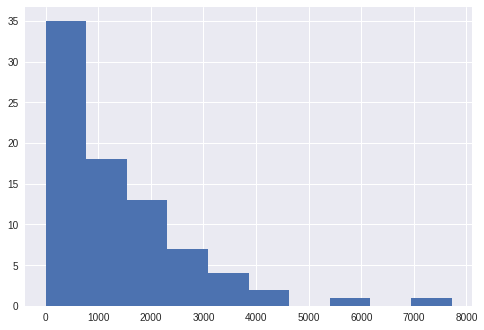

In [44]:
df.groupby('Neighbourhood').size().hist()
plt.show()

The number of observations per neighbourhood exhibits right skew. Bottom five (in terms of size) neighbourhoods have less than 50 observations.

Target variable (binary)
 - No-show

Indicator predictor variables:
 - Scholarship
 - Hipertension
 - Diabetes
 - Alcoholism
 - Handcap
 - SMS_received
 
Categorical predictor variables:
 - Gender
 - Neighbourhood
 
Continuous predictor variables:
 - Age
 - Days between appointment and scheduling (new feature)

## Conclusion

The dataset seems clean. We won't need to perform any data cleaning. But we'll need to transform the data (feature engineering) to create a new variable for the days between the appointment and when it was first scheduled. It is difficult to tell what is the quality of this data until some values are computed.

The neighbourhood variable contains sparse classes. Some of the neighbourhoods hardly have any observations. It is not yet clear what to do with this situation.

Furthermore, the observations are imbalanced on age and gender. We should keep this all in mind when we split data into training and testing subsets to stratify.